## 1- Import libraries

In [1]:
import sys
import tensorflow as tf
import numpy as np
%config InlineBackend.figure_format = 'retina'

/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# 2- Load dataset

In [2]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

print(X_train.shape)
print(Y_train.shape)
print('학습셋 이미지 수: %d 개' % (X_train.shape[0]))
print('테스트셋 이미지 수: %d 개' % (X_test.shape[0]))

(60000, 28, 28)
(60000,)
학습셋 이미지 수: 60000 개
테스트셋 이미지 수: 10000 개


5


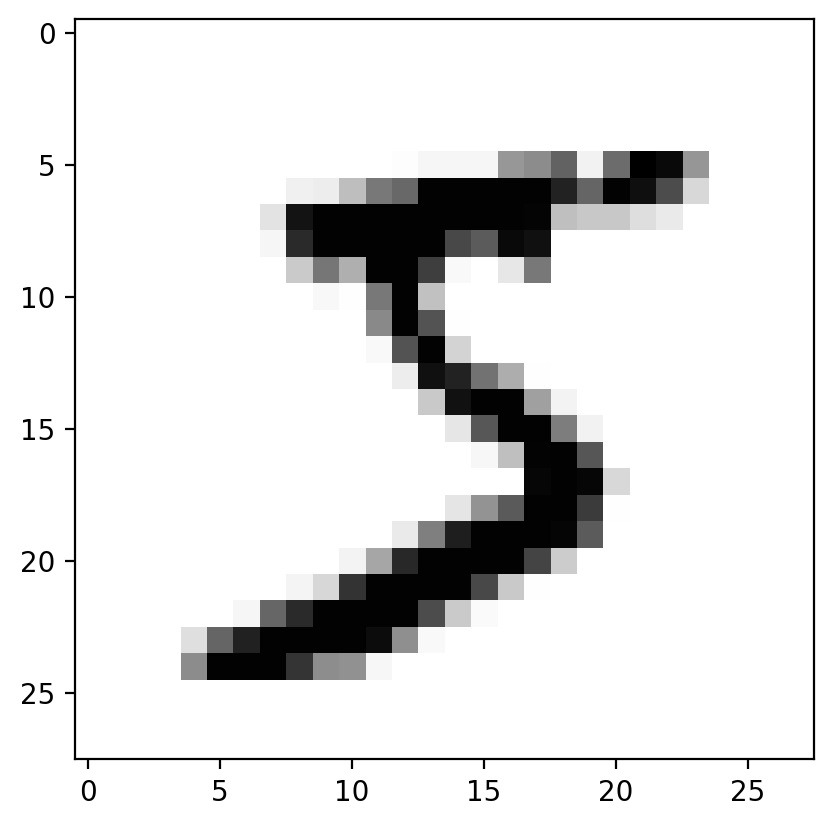

In [3]:
import matplotlib.pyplot as plt
print(Y_train[0])
plt.imshow(X_train[0], cmap = 'Greys')
plt.show()

In [4]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


# 3- Reshape & onehot vector

In [5]:
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')

In [6]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [7]:
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)
print(Y_train.shape)
print(Y_test.shape)

(60000, 10)
(10000, 10)


In [8]:
print(Y_test)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
print(Y_train.shape)
print(Y_test.shape)
print(Y_train[0])

(60000, 10)
(10000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
# Set numpy to print all elements of arrays
np.set_printoptions(threshold=np.inf)

print(Y_test)

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0.

# 4- Design model

In [9]:
input_layer = tf.keras.layers.Input(shape = (784,))
x = tf.keras.layers.Dense(512, activation = 'relu')(input_layer)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
out_layer = tf.keras.layers.Dense(10, activation = 'softmax')(x)

model = tf.keras.Model(inputs = [input_layer], outputs = [out_layer])
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-03-11 12:37:19.776728: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Max
2024-03-11 12:37:19.776753: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2024-03-11 12:37:19.776759: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2024-03-11 12:37:19.776836: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-11 12:37:19.777055: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


# 5- Complie

In [10]:
loss = tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
metric = tf.keras.metrics.categorical_accuracy
model.compile(
    loss = loss,
    optimizer = optimizer,
    metrics = [metric]
)

# 6- Training

In [16]:
history = model.fit(
    X_train, Y_train,
    validation_split = 0.2,
    epochs = 30,
    batch_size = 100,
    verbose = 1
)
print(history.history.keys())

Epoch 1/30
  6/480 [..............................] - ETA: 5s - loss: 5970.1748 - categorical_accuracy: 0.7150  

2024-03-11 12:40:24.747863: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


480/480 [==============================] - 7s 14ms/step - loss: 18657.7344 - categorical_accuracy: 0.6846 - val_loss: 18295.0039 - val_categorical_accuracy: 0.7518
Epoch 2/30
480/480 [==============================] - 7s 14ms/step - loss: 19962.4375 - categorical_accuracy: 0.7367 - val_loss: 17341.7070 - val_categorical_accuracy: 0.8007
Epoch 3/30
480/480 [==============================] - 7s 14ms/step - loss: 24697.6934 - categorical_accuracy: 0.7498 - val_loss: 21961.4805 - val_categorical_accuracy: 0.7525
Epoch 4/30
480/480 [==============================] - 7s 14ms/step - loss: 29110.5625 - categorical_accuracy: 0.7594 - val_loss: 20858.8809 - val_categorical_accuracy: 0.8238
Epoch 5/30
480/480 [==============================] - 7s 14ms/step - loss: 36215.0547 - categorical_accuracy: 0.7587 - val_loss: 34457.7773 - val_categorical_accuracy: 0.7786
Epoch 6/30
480/480 [==============================] - 7s 14ms/step - loss: 44224.2227 - categorical_accuracy: 0.7593 - val_loss: 36385.4

In [17]:
loss = history.history['loss']
print(loss)

[18657.734375, 19962.4375, 24697.693359375, 29110.5625, 36215.0546875, 44224.22265625, 53285.75390625, 55098.8515625, 64349.5625, 68233.1015625, 82782.5546875, 93126.9140625, 98560.8671875, 111624.1171875, 133834.84375, 129762.1015625, 134645.359375, 159705.15625, 174828.984375, 180103.359375, 194627.5, 205634.34375, 230162.640625, 228454.546875, 254132.5625, 271866.875, 282154.125, 291076.75, 307192.5, 334721.84375]


In [18]:
val_loss = history.history['val_loss']
print(val_loss)

[18295.00390625, 17341.70703125, 21961.48046875, 20858.880859375, 34457.77734375, 36385.453125, 44635.53515625, 65116.01171875, 34279.81640625, 56884.42578125, 62209.390625, 124320.078125, 81946.390625, 134503.453125, 142535.390625, 79391.6796875, 170161.46875, 180275.546875, 175623.1875, 170407.40625, 213522.40625, 117965.3046875, 144441.25, 143679.765625, 288284.90625, 233486.5, 267426.28125, 305561.03125, 326678.4375, 305453.09375]


# 7- Evaluation

In [19]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 3s 10ms/step - loss: 332208.2812 - categorical_accuracy: 0.7784

 Test Accuracy: 0.7784


In [20]:
def show_history_c(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(15, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['categorical_accuracy']
    val_accuracy = history_dict['val_categorical_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_categorical_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()
    # dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

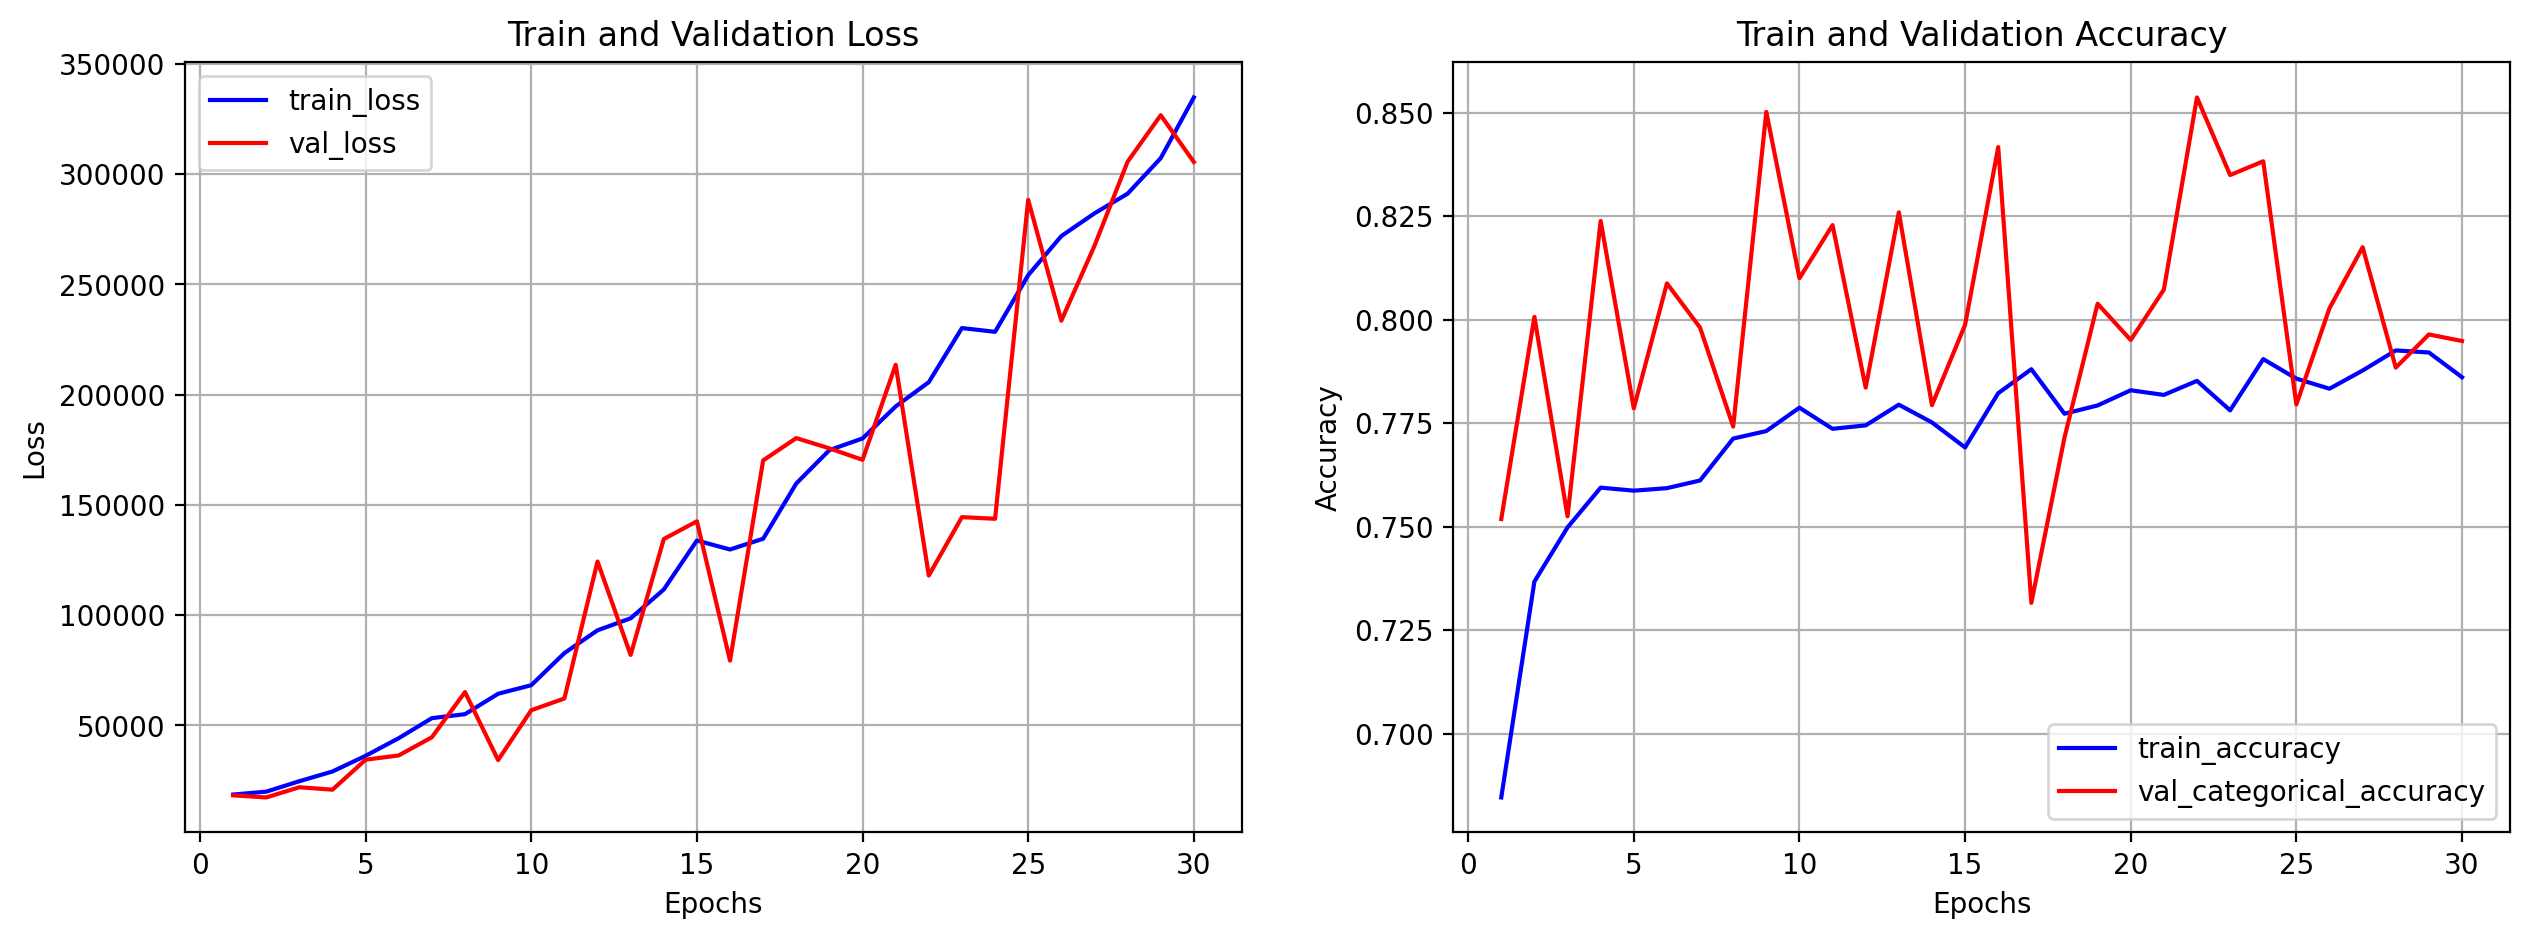

In [21]:
show_history_c(history)